In [97]:
library(RColorBrewer)

In [102]:
n <- 20
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

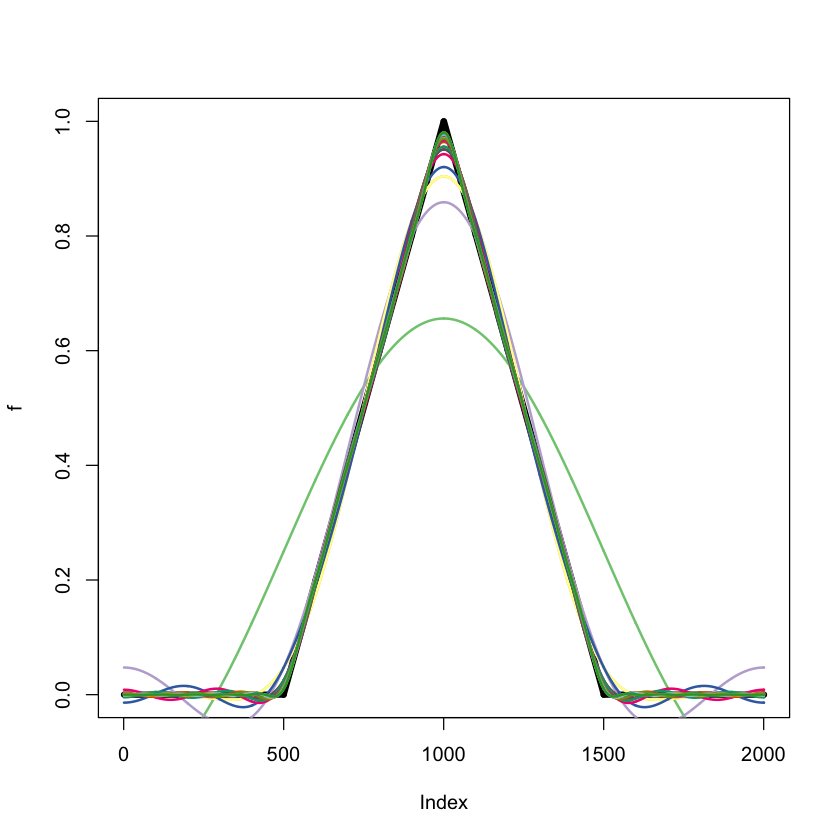

In [254]:
# Define domain
dx <- 0.001
L <- pi
x <- L * seq(-1+dx,1+dx,dx)
n <- length(x)
nquart <- as.integer(floor(n/4))

#define "hat" function
f <- rep(0.0, length(x))
f[(1+nquart):(2*nquart)] = (4/n)*seq(1,nquart,length.out=nquart)
f[(2*nquart+1):(3*nquart)] = rep(1, nquart) - (4/n)*seq(0, nquart, length.out=nquart)

f <- round(f, 3)

A0 = sum(f * rep(1, length(x))) * dx
fFS = A0/2


A = rep(0, 20)
B = rep(0, 20)

plot(f, type="l", lwd=5, col="black")

for (k in 1:20) {
    A[k] = sum(f * cos(pi*k*x/L)) * dx # Inner product
    B[k] = sum(f * sin(pi*k*x/L)) * dx
    fFS = fFS + A[k]*cos(k*pi*x/L) + B[k]*sin(k*pi*x/L)
    lines(fFS, col=col_vector[k], type="l", lwd=2)
}

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“16 y Werte <= 0 ausgelassen in logarithmischem Plot”


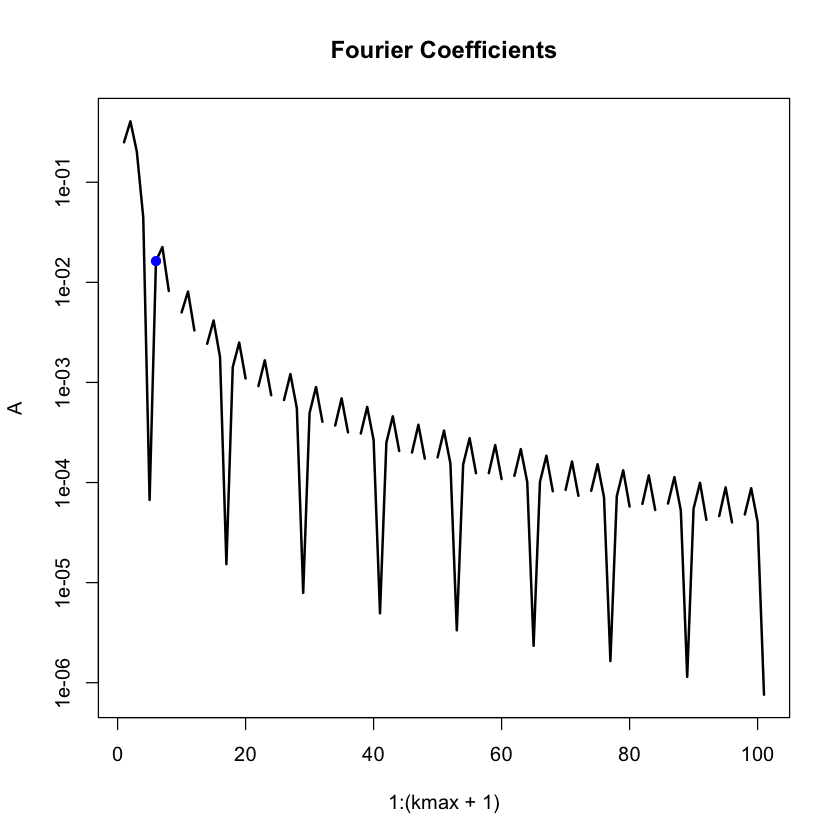

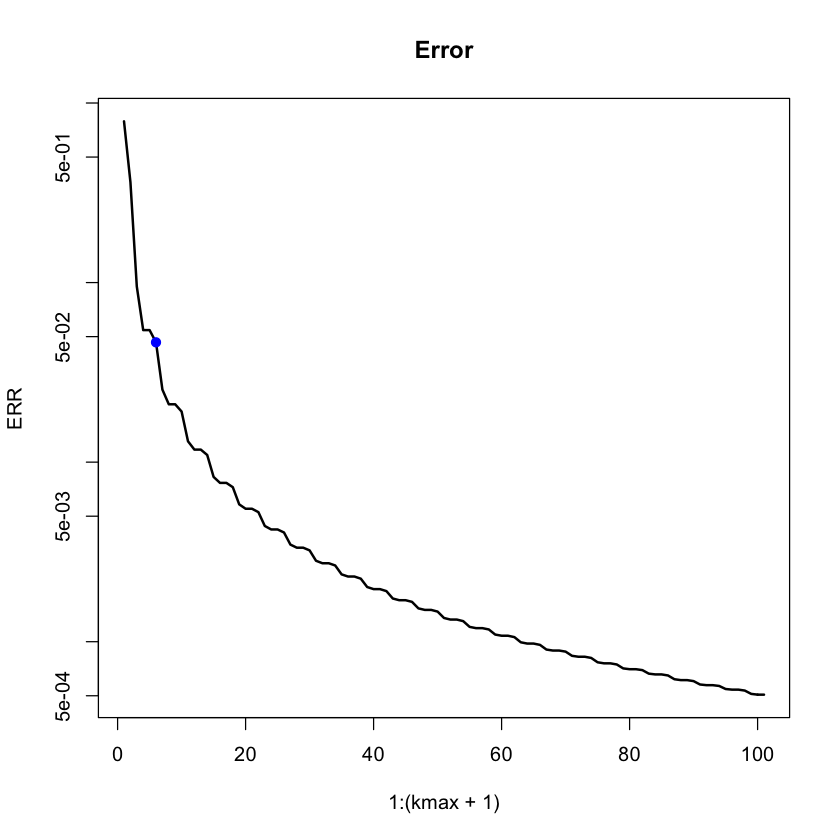

In [259]:
## Plot amplitudes

fFS = (A0/2) * rep(1, length(f))
kmax = 100
A = c(rep(0, kmax))
B = rep(0, kmax)
ERR = rep(0, kmax)

A[1] = A0/2
ERR[1] = norm(f-fFS, type="2")/norm(f, type="2")

for (k in 1:kmax) {
    A[k+1] = sum(f * cos(pi*k*x/L)) * dx
    B[k+1] = sum(f * sin(pi*k*x/L)) * dx
    fFS = fFS + A[k+1] * cos(k*pi*x/L) + B[k+1] * sin(k*pi*x/L)
    ERR[k+1] = norm(f-fFS, type="2")/norm(f, type="2")
    }
    
thresh = median(ERR) * sqrt(kmax) * (4/sqrt(3))
r <- max(which(ERR > thresh))


par(mfrow=c(1,1))
plot(1:(kmax+1),A,col="black", lwd=2, type="l", log="y")
points(r, A[r], col="blue", pch=19)
title("Fourier Coefficients")


plot(1:(kmax+1),ERR,col="black", lwd=2, type="l", log="y")
points(r, ERR[r], col="blue", pch=19)
title("Error")